# Laboratorio 1 - soluciones computacionales

## INTEGRANTES:
- Kenny Dong Jie Zhu Ye
- Samir David Mercado

In [183]:
from IPython.display import display, Math
import sympy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

# PUNTO 1

Escriba un polinomio $p(x)$ tal que $|sinc(x) − p(x)| ≤ 10^{-10}$ para $−0.2 ≤ x ≤ 0.2$, donde:
$$
f(x)= \left\{ \begin{array}{lcc}
             \frac{sin(x)}x &   si  &  x\neq 0 \\
             \\ 1 &  si  & x =  0
             \end{array}
   \right.
$$
es la función "$sinc$" (usada en procesamiento de señales, etc). Muestre ademas que su polinomio p cumple la condición: $|sinc(x) − p(x)| ≤ 10^-10$ para $x ∈ [−0.2, 0.2]$, grafique los errores teoricos y reales.

In [184]:
x = sp.symbols("x")  # creamos la variable x
sinc = sp.Piecewise((1, x==0), (sp.sin(x)/x, x!=0))  # asignamos la funcion

x0 = 0   # punto de expansion
n = 6    # numero de polinomio

In [185]:
p = sp.series(expr = sinc, x=x , x0=x0, n=n)   # genera la serie de taylor
display(Math(sp.latex(p)))   # muestra la serie en formato latex

<IPython.core.display.Math object>

In [186]:
max_n = 8
p = [sp.series(expr=sinc, x=x, x0=x0, n=ni).removeO() for ni in range(2,max_n)]

### Cota del error

$|f(0.18)-P_n(0.18)| = \frac{(\frac{sin(c)}{c})^{n+1}*0.18^{n+1}}{(n+1)!}\leq \frac{0.18^{n+1}}{(n+1)!}$

Para $c\in[0,0.18]$ , $f(x)=senc(x)$ , $x_{0}=0$ , $x=0.18$ , $S=10^{-10}$

In [187]:
n_pol = len(p)   # tamaño del polinomio a utilizar
pol_deg = np.arange(1,n_pol+1)  # cea una lista hasta el polinomi a utilizar

f_eval = sinc.subs(x,0.18).evalf() # intercambia valores de x en la funcion
error_experiment = []
for n in range(n_pol):
  p_n = p[n]
  p_eval = p_n.subs(x,0.18).evalf()   # intercambia valores de x en los polinomios
  error_experiment.append(np.abs(float(f_eval-p_eval)))  # error experimental añadiendo a la lista


found_n = False
for i in range(len(error_experiment)):
  if error_experiment[i] <= 10**-10:
    print(f"el polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^10 para −0.2 ≤ x ≤ 0.2 es: \n n = {i+1}")
    found_n = True
    break
if not found_n:
  print("no hay polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^10 para −0.2 ≤ x ≤ 0.2, escriba mas polinomios")
    

error_teoric = [((0.18)**(n+1))/(mt.factorial(n+1)) for n in pol_deg]   # error estimado con lagrange

print("\nvalores estimados o teoricos: ")
for i in range(len(pol_deg)):
  print(f"el valor de error estimado de n = {pol_deg[i]} es: {error_teoric[i]}")

print("\nvalores reales o experimentales: ")
for i in range(len(pol_deg)):
  print(f"el valor de errorx real de n = {pol_deg[i]} es: {error_experiment[i]}")

el polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^10 para −0.2 ≤ x ≤ 0.2 es: 
 n = 6

valores estimados o teoricos: 
el valor de error estimado de n = 1 es: 0.0162
el valor de error estimado de n = 2 es: 0.0009719999999999999
el valor de error estimado de n = 3 es: 4.373999999999999e-05
el valor de error estimado de n = 4 es: 1.5746399999999998e-06
el valor de error estimado de n = 5 es: 4.723919999999999e-08
el valor de error estimado de n = 6 es: 1.2147222857142854e-09

valores reales o experimentales: 
el valor de errorx real de n = 1 es: 0.005391258745421235
el valor de errorx real de n = 2 es: 8.741254578725766e-06
el valor de errorx real de n = 3 es: 8.741254578725766e-06
el valor de errorx real de n = 4 es: 6.745421221587833e-09
el valor de errorx real de n = 5 es: 6.745421221587833e-09
el valor de errorx real de n = 6 es: 3.0359048608374906e-12


#### Graficas

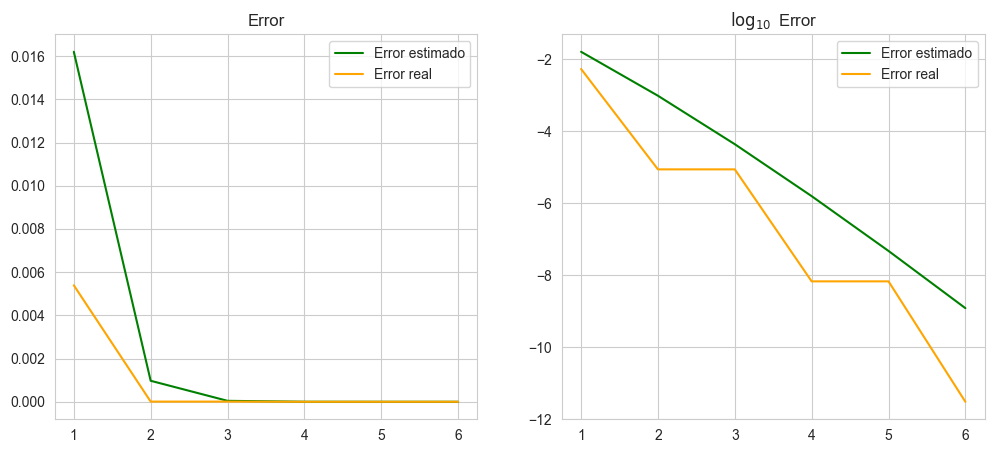

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(pol_deg,error_teoric,color='g')
ax1.plot(pol_deg,error_experiment, color ='orange')
ax1.set_title('Error')
ax1.legend(['Error estimado', 'Error real'], prop={'size':10})

ax2.plot(pol_deg,np.log10(error_teoric),color='g')
ax2.plot(pol_deg,np.log10(error_experiment), color = 'orange')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error estimado', 'Error real'], prop={'size':10});

# PUNTO 2
Halle las fórmulas de diferencias progresivas, regresivas y centrales para cualquier $f ∈ C4[a, b]$ tal que para $x_{0} ∈ (a,b)$ se tenga $O(h^3$). Luego, considere $f(x) = xln(x)$ y calcule $f′(1)$ para distintos valores de $h$, grafique los errores e indique qué valor de $h$ minimiza el error.

Por Taylor, nuestra función debe ser derivable hasta orden 4:

$f(x)=f(x_0)+f^{'}(x_0)(x-x_0)+f^{''}(x)\frac{(x-x_0)^{2}}{2!}+f^{'''}(x)\frac{(x-x_0)^{3}}{3!}+f^{''''}(c)\frac{(x-x_0)^{4}}{4!}$

Hallemos las formulas de diferencias progresivas y regresivas:

#### diferencia progresiva:
sea $x =x_0 + 2h$

$f(x_0+2h)=f(x_0)+2f^{'}(x_0)h+4f^{''}(x)\frac{h^{2}}{2!}+8f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$    $(Eq1)$

sea $x =x_0 + 3h$

$f(x_0+3h)=f(x_0)+3f^{'}(x_0)h+9f^{''}(x)\frac{h^{2}}{2!}+27f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq2)$

sea $x =x_0 + 4h$

$f(x_0+4h)=f(x_0)+4f^{'}(x_0)h+16f^{''}(x)\frac{h^{2}}{2!}+64f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq3)$

- $(Eq2 - \frac{9}{4}Eq1)$

$f(x_0+3h) - \frac{9}{4}f(x_0+2h)=-\frac{5}{4}f(x_0)-\frac{3}{2}f^{'}(x_0)h+9f^{''}(x)\frac{h^{2}}{2!}+9f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq4)$

- $(Eq3 - \frac{16}{9}Eq2)$

$f(x_0+4h) - \frac{16}{9}f(x_0+3h)=-\frac{-7}{9}f(x_0)-\frac{4}{3}f^{'}(x_0)h+16f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq5)$

- $(Eq5 - \frac{16}{9}Eq4)$

$f(x_0+4h) - \frac{32}{9}f(x_0+3h) + 4f(x_0-2h) = \frac{13}{9}f(x_0) + \frac{4}{3}hf^{'}(x_0) + Oh^4$

entonces:

$f^{'}(x_0) = \frac{3f(x_0+4h)-\frac{32}{3}f(x_0+3h)+12f(x_0+2h)-\frac{13}{3}f(x_0)}{4h}+Oh^3$   

#### diferencia regresiva:

sea $x =x_0 - 2h$

$f(x_0-2h)=f(x_0)-2f^{'}(x_0)h+4f^{''}(x)\frac{h^{2}}{2!}-8f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$    $(Eq1)$

sea $x =x_0 - 3h$

$f(x_0-3h)=f(x_0)-3f^{'}(x_0)h+9f^{''}(x)\frac{h^{2}}{2!}-27f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq2)$

sea $x =x_0 - 4h$

$f(x_0-4h)=f(x_0)-4f^{'}(x_0)h+16f^{''}(x)\frac{h^{2}}{2!}-64f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq3)$

- $(Eq2 - \frac{9}{4}Eq1)$

$f(x_0-3h) - \frac{9}{4}f(x_0-2h)=-\frac{5}{4}f(x_0)+\frac{3}{2}f^{'}(x_0)h+9f^{''}(x)\frac{h^{2}}{2!}-9f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq4)$

- $(Eq3 - \frac{16}{9}Eq2)$

$f(x_0-4h) - \frac{16}{9}f(x_0-3h)=-\frac{-7}{9}f(x_0)+\frac{4}{3}f^{'}(x_0)h-16f^{'''}(x)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq5)$

- $(Eq5 - \frac{16}{9}Eq4)$

$f(x_0-4h) - \frac{32}{9}f(x_0-3h) + 4f(x_0-2h) = \frac{13}{9}f(x_0) - \frac{4}{3}hf^{'}(x_0) + Oh^4$

entonces:

$f^{'}(x_0) = \frac{-3f(x_0-4h)+\frac{32}{3}f(x_0-3h)-12f(x_0-2h)+\frac{13}{3}f(x_0)}{4h}+Oh^3$   

#### Función dada:

In [189]:
x = sp.Symbol('x')
f = x * sp.ln(x)    

#### Aproximaciones progresivas y regresivas

In [190]:
x0 = 1
h_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


aprox_prog = []
aprox_reg = []

for h in h_values:
    
    f_prog = (3*f.subs(x, x0+4*h) - (32/3)*f.subs(x, x0 + 3*h) + 
                12*f.subs(x, x0+2*h) - (13/3)*f.subs(x, x0)) / (4*h)
                
    f_reg = (-3*f.subs(x, x0-4*h) + (32/3)*f.subs(x, x0 - 3*h) 
                - 12*f.subs(x, x0-2*h) + (13/3)*f.subs(x, x0)) / (4*h)

    aprox_prog.append(f_prog)
    aprox_reg.append(f_reg)

print("aroximaciones progresivas: ")
for i in range(len(h_values)):
    print(f"las aproximacion progresiva de h = {h_values[i]} es: {aprox_prog[i]}")

print("\naproximaciones regresivas: ")
for i in range(len(h_values)):
    print(f"las aproximacion regresiva de h = {h_values[i]} es: {aprox_reg[i]}")

aroximaciones progresivas: 
las aproximacion progresiva de h = 0.01 es: 1.00000189624274
las aproximacion progresiva de h = 0.02 es: 1.00001440306984
las aproximacion progresiva de h = 0.03 es: 1.00004621393779
las aproximacion progresiva de h = 0.04 es: 1.00010427375926
las aproximacion progresiva de h = 0.05 es: 1.00019409036690
las aproximacion progresiva de h = 0.06 es: 1.00031998776433
las aproximacion progresiva de h = 0.07 es: 1.00048531295606
las aproximacion progresiva de h = 0.08 es: 1.00069260554818
las aproximacion progresiva de h = 0.09 es: 1.00094373733448
las aproximacion progresiva de h = 0.1 es: 1.00124002756541

aproximaciones regresivas: 
las aproximacion regresiva de h = 0.01 es: 0.999997887431143
las aproximacion regresiva de h = 0.02 es: 0.999982119980368
las aproximacion regresiva de h = 0.03 es: 0.999936049932844
las aproximacion regresiva de h = 0.04 es: 0.999839069078191
las aproximacion regresiva de h = 0.05 es: 0.999665657394007
las aproximacion regresiva de

### errores

hallamos el error de las progresivas y regresivas con: 

$error = \frac{|valor_{real} - aprox|}{valor_{real}}$

In [191]:
f_diff = sp.diff(f, x)
print(f"la derivada de la funcion es {f_diff}")
valor_real = f_diff.subs(x, x0)
print(f"el valor real o de f'(1) es: {valor_real}")

print("\nerrores progresivas: ")
repr_prog = []
for ep in aprox_prog:
    error_prog = (np.abs(valor_real-ep))/valor_real
    repr_prog.append(error_prog)
print(repr_prog)

print("\nerrores regresivas")

repr_reg = []
for er in aprox_reg:
    error_reg = (np.abs(valor_real-er))/valor_real
    repr_reg.append(error_reg)
print(repr_reg)

la derivada de la funcion es log(x) + 1
el valor real o de f'(1) es: 1

errores progresivas: 
[1.89624273727595e-6, 1.44030698376874e-5, 4.62139377859216e-5, 0.000104273759264917, 0.000194090366900435, 0.000319987764327401, 0.000485312956059580, 0.000692605548180625, 0.000943737334476724, 0.00124002756540986]

errores regresivas
[2.11256885651601e-6, 1.78800196320994e-5, 6.39500671556492e-5, 0.000160930921808689, 0.000334342605993410, 0.000615830667111128, 0.00104472767993069, 0.00167008087435783, 0.00255331221110866, 0.00377174836834604]


#### graficas de errores

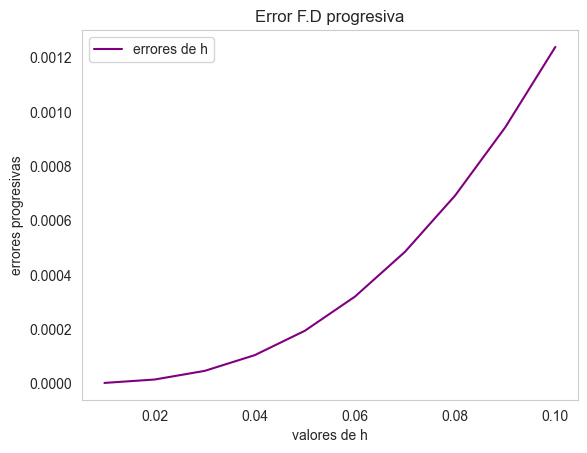

In [192]:
x1 = h_values
y1 = repr_prog

plt.plot(x1,y1, label = 'errores de h', color = 'purple')
plt.title('Error F.D progresiva')
plt.legend()
plt.xlabel('valores de h')
plt.ylabel('errores progresivas')
plt.grid(False)
plt.show()

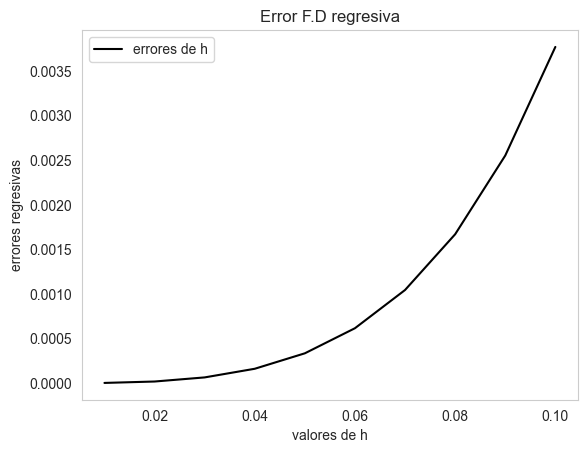

In [193]:
x2 = h_values
y2 = repr_reg

plt.plot(x2,y2, label = 'errores de h', color = 'black')
plt.title('Error F.D regresiva')
plt.legend()
plt.xlabel('valores de h')
plt.ylabel('errores regresivas')
plt.grid(False)
plt.show()

# PUNTO 3
Considere la función: $f(x) = xsin(x)$ grafique en un solo lienzo a $f$ y los polinomios de Taylor
de grado $n = 1,2,...,6$ para: $x_0∈(−5π,5π)$.

In [194]:
x = sp.symbols("x")
x_sinx = x*sp.sin(x)

x0 = 0
n = 6

In [195]:
p = sp.series(expr= x_sinx, x=x, x0=x0, n=n)
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [196]:
max_n = 10
p = [sp.series(expr = x_sinx, x0=x0, n=n).removeO() for n in range(4,max_n)]
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

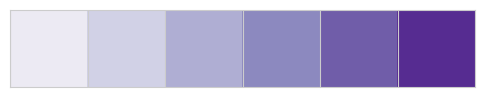

In [197]:
sns.set_style('whitegrid')
cmap = sns.color_palette('Purples', n_pol)
sns.palplot(cmap)

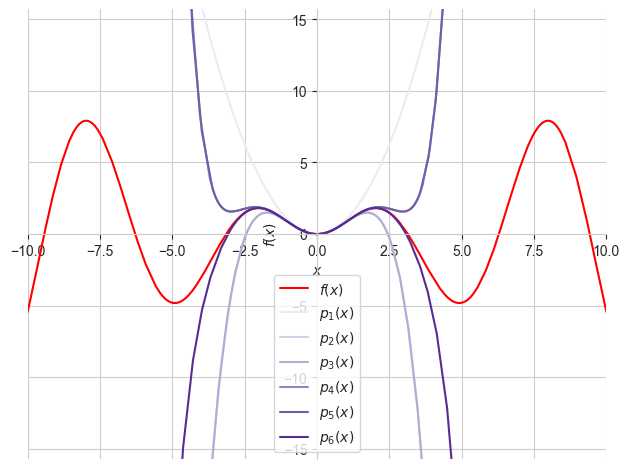

In [198]:
fig = pls.plot(x_sinx,xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()